<a href="https://colab.research.google.com/github/alphalyncis/adaa/blob/main/ml/workshop_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Set-up: Run the following cell to configure our working directory appropriately.
If we are running on Google Colab, the following cell will clone the notebooks into our Colab filespace. If instead running locally, it will add the parent directory of the notebooks to the path such that we can import the custom module ```funcs```.

In [1]:
import sys
if 'google.colab' in sys.modules:
    !git clone https://github.com/harry-rendell/MLworkshop.git
    sys.path.append('./MLworkshop')
else:
    sys.path.append('..')

Cloning into 'MLworkshop'...
remote: Enumerating objects: 223, done.
remote: Counting objects: 100% (20/20), done.
remote: Compressing objects: 100% (16/16), done.
remote: Total 223 (delta 7), reused 11 (delta 4), pack-reused 203
Receiving objects: 100% (223/223), 1.69 MiB | 9.73 MiB/s, done.
Resolving deltas: 100% (108/108), done.


## Tips!
* In Google Colab you can pass your cursor over a function to see what it does.
* If instead you are running locally, you can use Shift+Tab while your cursor is in a function to see what it does.

# Introduction
---
We are going to build and train a simple neural network to classify the MNIST dataset. This dataset contains 1,796 grayscale images of handwritten digits from 0 to 9. The images are an 8x8 grid of pixel values. Although this is an easy task for a human, it's not so easy for a computer. Since every image in the database is unique, we need a model which can adapt to different handwriting styles and classify them accurately. This is where machine learning comes in!

In [4]:
# Standard imports
import numpy as np
import matplotlib.pyplot as plt
# Keras imports
from tensorflow.python.keras.utils.vis_utils import plot_model
from tensorflow.python.keras.models import Model
from tensorflow.python.keras.layers import Input, Dense, Flatten, Reshape, Dropout
from tensorflow.keras.regularizers import l1_l2
# Custom imports
from funcs.plotting import plot_classifications, plot_training, plot_data

# Load in data
---

In [5]:
from sklearn import datasets
digits = datasets.load_digits()
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(digits.images, digits.target, test_size=0.6, shuffle=True)
x_train = x_train/x_train.max() # Normalise data so pixel values are between 0 and 1
x_test  = x_test/x_train.max()
input_shape  = (8,8)
n_classes = 10 # we have 10 different classes, ie 10 integers from 0 to 9

# Plot the data
---
### Let's see what we're working with here.

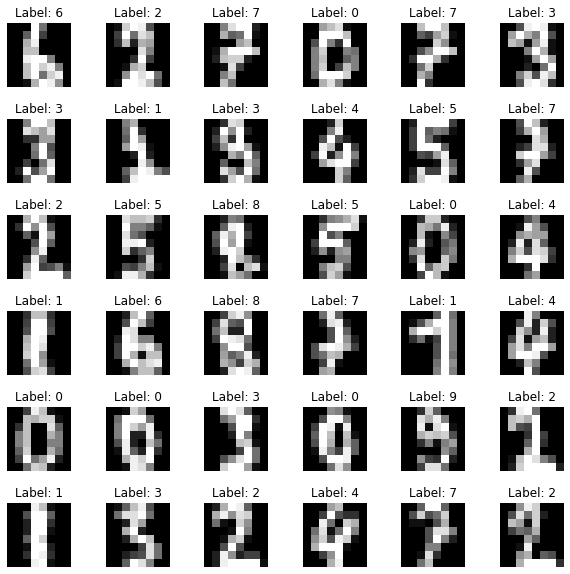

In [6]:
plot_data(x_train, y_train)

# Making your model
---
### This is the basic structure of constructing a dense neural network using Keras
> ```
> Line 1: i = Input(shape)
> Line 2: x = Flatten()(i)
> Line 3: x = Dense(n_nodes, activation='relu')(x)
> Line 4: x = Dense(n_nodes, activation='relu')(x)
> ...
> Line 5: o = Dense(n_classes, activation='softmax')(x)
>
> Line 6: mymodel = Model(i, o, name='My first model!')
> Line 7: mymodel.summary()

* Line 1: We set the input of the model using the shape of our input. Since we are using 8x8 images in the training data, our input shape is (8,8). You can use the ```input_shape``` parameter defined earlier.
* Line 2: This step flattens the 2D input with shape (8,8) into a 1D array with shape (64,), since Dense networks require a 1D input. Note that for every layer we need to pass the previous layer to the current one. Here we do this by putting (i) at the end which passes the input to Flatten().
* Line 3: Here we create the first layer. We can choose how many nodes we want in this layer (more nodes = able to model complex data better, but takes longer to train). We also need to set the activation, a sensible choice would be activation='relu'.
* Line 4: We can add more layers like this, provided we pass the previous layer to the new layer by putting (x) at the end as before.
* Line 5: We define the final ouput layer. The output shape needs to match the shape of the label data (y_train), ie 10. These 10 numbers will correspond to the probability that the input is each of the numbers 0-9. We must use the 'softmax' activation function here as it ensures the probabilities sum to 1.
* Line 6: We construct the model using the ```Model()``` function. We pass the input and output as arguments. You can also name the model anything you like, e.g. name = 'My first model!'
* Line 7: Prints a summary of our model

In [31]:
### Use the template above to make your model here
i = Input(input_shape)
x = Flatten()(i)
x = Dense(50, activation='relu')(x)
x = Dense(50, activation='relu')(x)
x = Dense(50, activation='relu')(x)
o = Dense(n_classes, activation='softmax')(x)
mymodel = Model(i, o, name='digit_recognition_model')
mymodel.summary()

Model: "digit_recognition_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_11 (InputLayer)        [(None, 8, 8)]            0         
_________________________________________________________________
flatten_10 (Flatten)         (None, 64)                0         
_________________________________________________________________
dense_37 (Dense)             (None, 50)                3250      
_________________________________________________________________
dense_38 (Dense)             (None, 50)                2550      
_________________________________________________________________
dense_39 (Dense)             (None, 50)                2550      
_________________________________________________________________
dense_40 (Dense)             (None, 10)                510       
Total params: 8,860
Trainable params: 8,860
Non-trainable params: 0
_________________________________________

# Training your model
---
### Now you have defined your model, use the template below to compile and train it.
> ```
> Line 8: mymodel.compile(...)
> Line 9: mymodel_history = mymodel.fit(...)


* Line 8: Here we compile the model using ```.compile()```. We need to pass the following arguments: 
    * optimizer='adam' - a particularly good adaptive optimizer. See https://arxiv.org/abs/1412.6980 if you are interested
    * loss='sparse_categorical_crossentropy' - we need to use this loss function for classification tasks
    * metrics='accuracy' - ask the model to calculate the accuracy during training


* Line 9: Train the model using ```.fit()```. We need to pass a few arguments here:
    * x - training images
    * y - training labels
    * epochs - how long to train for. ~100 is a good start.
    * batch_size - how many images to group up for each training step. ~32 is sensible.
    * validation_data - the test images and labels, ie (x_test, y_test).
    * verbose - Set this to True if you wish to see the progress of training. Otherwise set to False.
    
Note, you will need to rerun lines 1-9 if you wish to start training from scratch, as if you only run lines 8 & 9 it will continue where it left off.

In [32]:
### Use the template above to compile and fit your model here
mymodel.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
mymodel_history = mymodel.fit(x=x_train, y=y_train, epochs=100, batch_size=32, validation_data=(x_test, y_test), verbose=True)


Epoch 1/100
23/23 [==============================] - 1s 14ms/step - loss: 2.2307 - accuracy: 0.2730 - val_loss: 1.5419 - val_accuracy: 0.5199
Epoch 2/100
23/23 [==============================] - 0s 7ms/step - loss: 1.9245 - accuracy: 0.5836 - val_loss: 1.5981 - val_accuracy: 0.6478
Epoch 3/100
23/23 [==============================] - 0s 6ms/step - loss: 1.4189 - accuracy: 0.7535 - val_loss: 1.5148 - val_accuracy: 0.8109
Epoch 4/100
23/23 [==============================] - 0s 7ms/step - loss: 0.8749 - accuracy: 0.8635 - val_loss: 1.7422 - val_accuracy: 0.8656
Epoch 5/100
23/23 [==============================] - 0s 7ms/step - loss: 0.5289 - accuracy: 0.9053 - val_loss: 1.7196 - val_accuracy: 0.8925
Epoch 6/100
23/23 [==============================] - 0s 6ms/step - loss: 0.3667 - accuracy: 0.9164 - val_loss: 1.7967 - val_accuracy: 0.9055
Epoch 7/100
23/23 [==============================] - 0s 7ms/step - loss: 0.2822 - accuracy: 0.9248 - val_loss: 1.5717 - val_accuracy: 0.9212
Epoch 8/100


# Plot progress of training
---

### Now you have defined your model, use the template below to compile and train it.
> ```
> Line 10: plot_training(...)
> Line 11: mymodel.evaluate(...)


* Line 10: Pass the output from Line 9 as the argument to my custom function plot_training() to see how the training progressed over time.

* Line 11: Evaluate the model on the test data to find the final accuracy. Note that this function returns two numbers, loss and accuracy, but we are only interested in the accuracy at this point.

34/34 [==============================] - 0s 2ms/step - loss: 2.4602 - accuracy: 0.9601
Accuracy is: 0.960148274898529


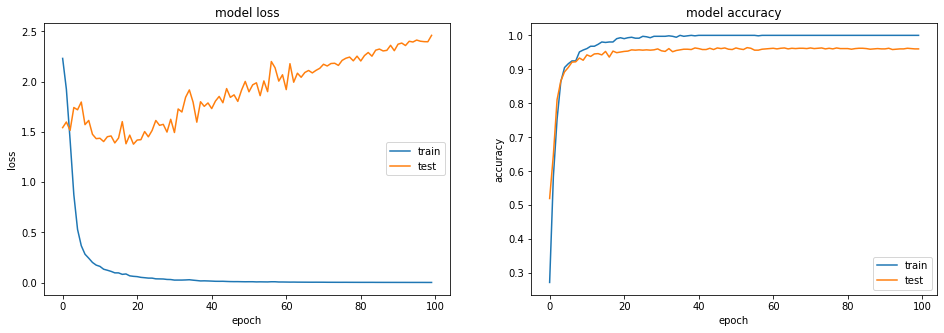

In [33]:
### Use the template above to plot the training of your model, and evaluate the final test accuracy.
plot_training(mymodel_history)
loss, accuracy = mymodel.evaluate(x_test, y_test)
print("Accuracy is:", accuracy)

# Plot classifications
---
### Let's plot some of the test data along with the predicted classifcations from the network.
> ```
> Line 12: predicted = mymodel.predict(x_test).argmax(axis=-1)
> Line 13: plot_classifications(x_test, y_test, predicted)


* Line 12: Ask the network to predict the labels of the test data. Then choose the one with the highest probability (argmax)

* Line 13: Use my custom function to plot a grid of test data with their true and predicted labels. Note, misclassifications will appear in red.

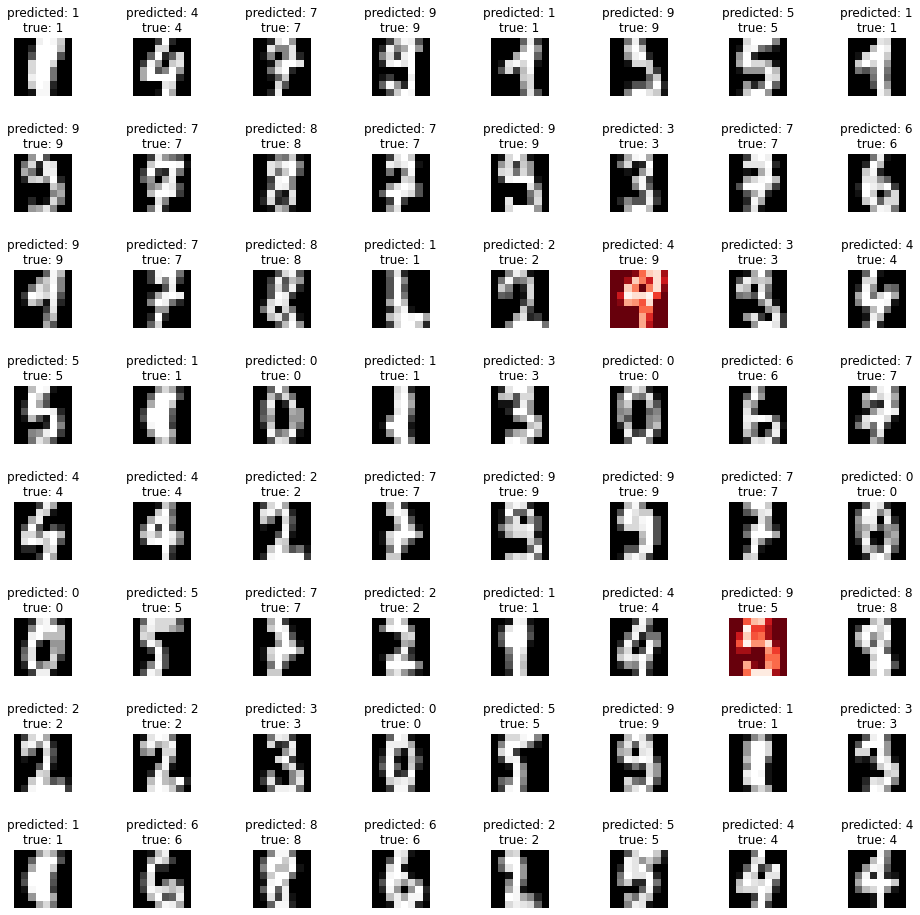

In [34]:
### Use the template above to predict and plot the classifications of the test data
predicted = mymodel.predict(x_test).argmax(axis=-1)
plot_classifications(x_test, y_test, predicted)

# What happens if we train for too long?
---
### Recompile your model and train your network for longer, what happens to the test accuracy?

Epoch 1/500
23/23 [==============================] - 1s 21ms/step - loss: 2.2745 - accuracy: 0.0905 - val_loss: 4.3078 - val_accuracy: 0.1075
Epoch 2/500
23/23 [==============================] - 0s 6ms/step - loss: 2.2450 - accuracy: 0.1072 - val_loss: 4.4551 - val_accuracy: 0.1075
Epoch 3/500
23/23 [==============================] - 0s 6ms/step - loss: 2.2214 - accuracy: 0.1226 - val_loss: 4.4460 - val_accuracy: 0.1103
Epoch 4/500
23/23 [==============================] - 0s 6ms/step - loss: 2.1931 - accuracy: 0.1532 - val_loss: 5.2312 - val_accuracy: 0.1084
Epoch 5/500
23/23 [==============================] - 0s 7ms/step - loss: 2.1620 - accuracy: 0.1518 - val_loss: 5.1034 - val_accuracy: 0.1260
Epoch 6/500
23/23 [==============================] - 0s 6ms/step - loss: 2.1231 - accuracy: 0.2033 - val_loss: 5.9324 - val_accuracy: 0.1260
Epoch 7/500
23/23 [==============================] - 0s 6ms/step - loss: 2.0694 - accuracy: 0.2159 - val_loss: 5.6113 - val_accuracy: 0.1381
Epoch 8/500


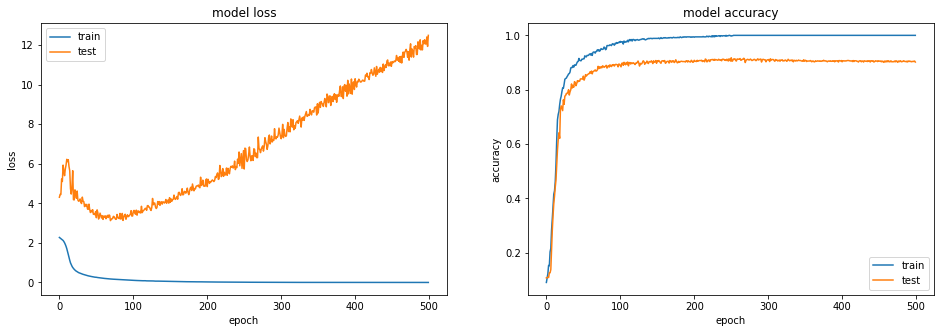

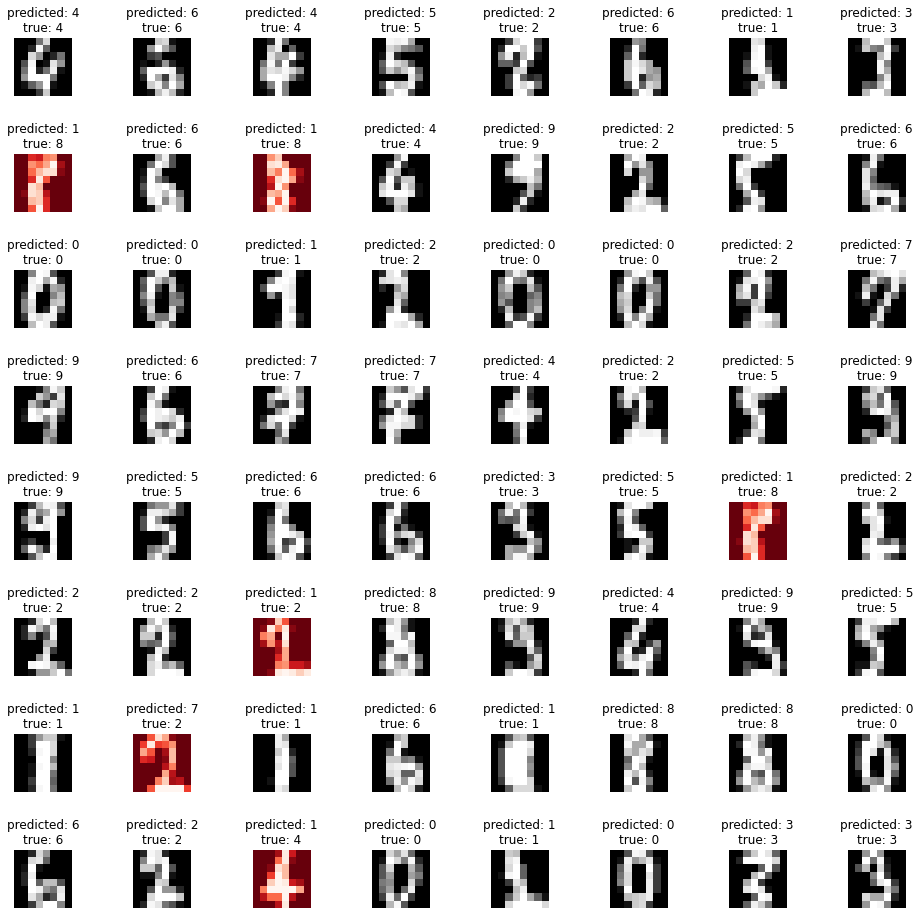

In [27]:
### Copy your code corresponding to lines 1-11, then increase epochs (max 500 otherwise it will take too long)
i = Input(input_shape)
x = Flatten()(i)
x = Dense(10, activation='relu')(x)
x = Dense(10, activation='relu')(x)
x = Dense(10, activation='relu')(x)
o = Dense(n_classes, activation='softmax')(x)
mymodel = Model(i, o, name='digit_recognition_model')

mymodel.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
mymodel_history = mymodel.fit(x=x_train, y=y_train, epochs=500, batch_size=32, validation_data=(x_test, y_test), verbose=True)
plot_training(mymodel_history)
loss, accuracy = mymodel.evaluate(x_test, y_test)
print("Accuracy is:", accuracy)
predicted = mymodel.predict(x_test).argmax(axis=-1)
plot_classifications(x_test, y_test, predicted)

# Improving test accuracy
---
### Some techniques we can use to improve test accuracy:
* Dropout - During training, a random fraction of nodes are deactivated for each training step. E.g. inserting Dropout(0.1) after a Dense() layer will randomly deactivate 10% of the nodes of that Dense layer, for each training step. This benefits the network as it encourages it to behave like a combination of smaller networks, each of which can continue to work even when some fail to classify. To use dropout, insert the  ```Dropout()``` function after the Dense() layer that you would like to apply the dropout to.
* L1/L2 Regularisation - Gradually sets unused weights to zero. You can use the ```l1_l2()``` function and pass it to a Dense layer using ```Dense(..., bias_regularizer=l1_l2() )```

Epoch 1/80
23/23 [==============================] - 2s 16ms/step - loss: 2.2583 - accuracy: 0.1518 - val_loss: 3.0420 - val_accuracy: 0.2873
Epoch 2/80
23/23 [==============================] - 0s 7ms/step - loss: 2.0822 - accuracy: 0.3217 - val_loss: 2.9880 - val_accuracy: 0.4226
Epoch 3/80
23/23 [==============================] - 0s 7ms/step - loss: 1.7689 - accuracy: 0.4930 - val_loss: 2.5507 - val_accuracy: 0.6450
Epoch 4/80
23/23 [==============================] - 0s 7ms/step - loss: 1.3409 - accuracy: 0.6602 - val_loss: 2.3851 - val_accuracy: 0.7757
Epoch 5/80
23/23 [==============================] - 0s 7ms/step - loss: 1.0210 - accuracy: 0.7033 - val_loss: 2.5215 - val_accuracy: 0.8082
Epoch 6/80
23/23 [==============================] - 0s 7ms/step - loss: 0.8170 - accuracy: 0.7437 - val_loss: 2.2427 - val_accuracy: 0.8656
Epoch 7/80
23/23 [==============================] - 0s 7ms/step - loss: 0.6617 - accuracy: 0.8078 - val_loss: 2.3481 - val_accuracy: 0.8526
Epoch 8/80
23/23 [=

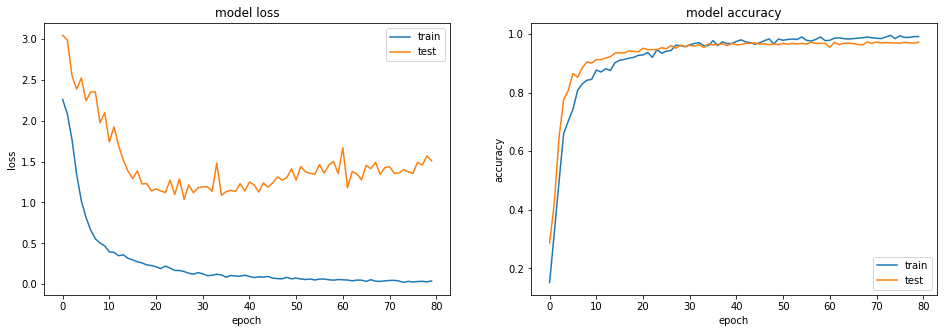

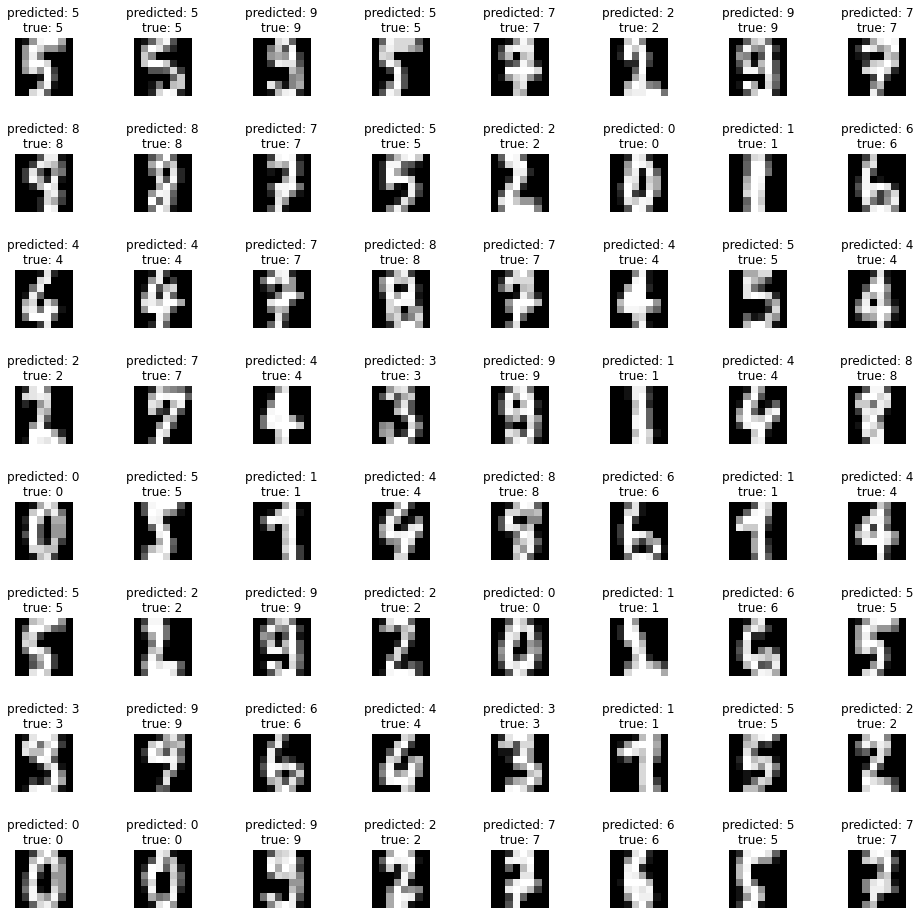

In [51]:
### Copy your code corresponding to lines 1-11, then add Dropout and/or L1/L2 Regularisation 
i = Input(input_shape)
x = Flatten()(i)
x = Dense(50, activation='relu')(x)
x = Dropout(rate=0.1)(x)
x = Dense(50, activation='relu')(x)
x = Dropout(rate=0.1)(x)
x = Dense(50, activation='relu', bias_regularizer=l1_l2())(x)
x = Dropout(rate=0.1)(x)
o = Dense(n_classes, activation='softmax')(x)
mymodel = Model(i, o, name='digit_recognition_model')

mymodel.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
mymodel_history = mymodel.fit(x=x_train, y=y_train, epochs=80, batch_size=32, validation_data=(x_test, y_test), verbose=True)
plot_training(mymodel_history)
loss, accuracy = mymodel.evaluate(x_test, y_test)
print("Accuracy is:", accuracy)
predicted = mymodel.predict(x_test).argmax(axis=-1)
plot_classifications(x_test, y_test, predicted)

# Challenge!
### I was able to make a network with a test accuracy 98.1%. Can you do better than this using Dropout and Regularisation?

In [ ]:
### Make your best model here!
